<a href="https://colab.research.google.com/github/UtkarshC99/creative-shock-prelim-1/blob/main/Creative_Shock_2020_Prelim1_Bruhmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Importing data

The raw data was tabulated in Excel, and imported as a .csv (comma-separated values). This was uploaded to Github for universal access.

In [2]:
day_git = 'https://raw.githubusercontent.com/UtkarshC99/creative-shock-prelim-1/main/daily_kpis.csv'
month_git = 'https://raw.githubusercontent.com/UtkarshC99/creative-shock-prelim-1/main/monthly_kpis.csv'
monthly = pd.read_csv(month_git)
pd.to_datetime(monthly.month)

daily = pd.read_csv(day_git, index_col = 'day')

# Ratios that were utilised

The ratios used for plotting and analysis were calculated by dividing the provided raw data. This helps gain insights into the **behaviour and ordering habits** of the average visitor and the average table, the **performance of dishes** pre and post revamp, and the **amount of revenue generated** from visitors and groups. 

$$\textbf{(1) Avg. no. of visitors per receipt}  = \dfrac{\textbf{No. of visitors}}{\textbf{No. of receipts}} \\ \text{(i.e. average number of people per table/group)}$$
<br/><br/>
$$\textbf{(2) Avg. no. of items ordered per receipt} = \dfrac{\textbf{No. of items}}{\textbf{No. of receipts}} \\ \text{(i.e. average size of an order)}$$
<br/><br/>
$$\textbf{(3) Avg. revenue per receipt} = \dfrac{\textbf{Revenue}}{\textbf{No. of receipts}} \\ \text{(i.e. average revenue earned per order)}$$
<br/><br/>
$$\textbf{(4) Avg. revenue per visitor} = \dfrac{\textbf{Revenue}}{\textbf{No. of visitors}} \\ \text{(i.e. average spending per-capita)}$$
<br/><br/>
$$\textbf{(5) Avg. revenue per item ordered} = \dfrac{\textbf{Revenue}}{\textbf{No. of items}} \\ \text{(i.e. average price of items sold)}$$
<br/><br/>
$$\textbf{(6) Avg. no. of items per visitor} = \dfrac{\textbf{No. of items}}{\textbf{No. of visitors}} \\ \text{(i.e. no. of items ordered by the average visitor)}$$

In [3]:
# average number of visitors per receipt
monthly['avg_size'] = monthly.visitors/monthly.receipts
daily['avg_size_pre'] = daily.visitors_pre/daily.receipts_pre
daily['avg_size_post'] = daily.visitors_post/daily.receipts_post

# average number of items ordered per receipt
monthly['avg_order'] = monthly['items']/monthly.receipts
daily['avg_order_pre'] = daily.items_pre/daily.receipts_pre
daily['avg_order_post'] = daily.items_post/daily.receipts_post

# average revenue from a receipt
monthly['avg_check'] = monthly.revenue/monthly.receipts
daily['avg_check_pre'] = daily.revenue_pre/daily.receipts_pre
daily['avg_check_post'] = daily.revenue_post/daily.receipts_post

# average revenue per visitor
monthly['avg_per_cap'] = monthly.revenue/monthly.visitors
daily['avg_per_cap_pre'] = daily.revenue_pre/daily.visitors_pre
daily['avg_per_cap_post'] = daily.revenue_post/daily.visitors_post

# average revenue per item ordered
monthly['avg_per_item'] = monthly.revenue/monthly['items']
daily['avg_per_item_pre'] = daily.revenue_pre/daily.items_pre
daily['avg_per_item_post'] = daily.revenue_post/daily.items_post

# average no. of items ordered per visitor
monthly['avg_percap_ite'] = monthly['items']/monthly.visitors
daily['avg_percap_ite_pre'] = daily.items_pre/daily.visitors_pre
daily['avg_percap_ite_post'] = daily.items_post/daily.visitors_post

The following is the table we'll be using for plotting the graphs. It has different columns for month and year, which we shall use later to compare pre and post revamp figures.

In [4]:
mo = monthly.copy(deep = True)
mo['month'] = pd.to_datetime(mo['month'])
mo['yr'] = mo['month'].dt.year
mo['m_nm'] = mo['month'].dt.strftime('%b')
mo.head()

,month,visitors,receipts,revenue,items,avg_size,avg_order,avg_check,avg_per_cap,avg_per_item,avg_percap_ite,yr,m_nm
0,2019-01-01,9522.0,5848.0,52642.0,12504.0,1.628249,2.138167,9.001710,5.528460,4.210013,1.313170,2019,Jan
1,2019-02-01,11264.0,6491.0,57380.0,13504.0,1.735326,2.080419,8.839932,5.094105,4.249111,1.198864,2019,Feb
2,2019-03-01,11292.0,6901.0,61591.0,14380.0,1.636285,2.083756,8.924938,5.454392,4.283102,1.273468,2019,Mar
3,2019-04-01,13802.0,8304.0,73172.0,18006.0,1.662091,2.168353,8.811657,5.301550,4.063757,1.304594,2019,Apr
4,2019-05-01,14932.0,8655.0,82122.0,19131.0,1.725246,2.210399,9.488388,5.499732,4.292614,1.281208,2019,May


In [5]:
# separate tables for post and pre revamp monthly data.

mo_2019 = mo.loc[mo.yr == 2019]
mo_2020 = mo.loc[mo.yr == 2020]

# Plotting graphs for monthly data and ratios

### Defining label properties

In [6]:
# properties of title text
title_font = {'family' : 'serif',
              'size' : 32,
              'weight' : 'bold'}

# defining colours and labels for the legend
import matplotlib.patches as mpatches

red = mpatches.Patch(color = 'red', 
                              label = 'Pre-revamp (2019)')
green = mpatches.Patch(color = 'green', 
                              label = 'Post-revamp (2020)')

### Plotting functions

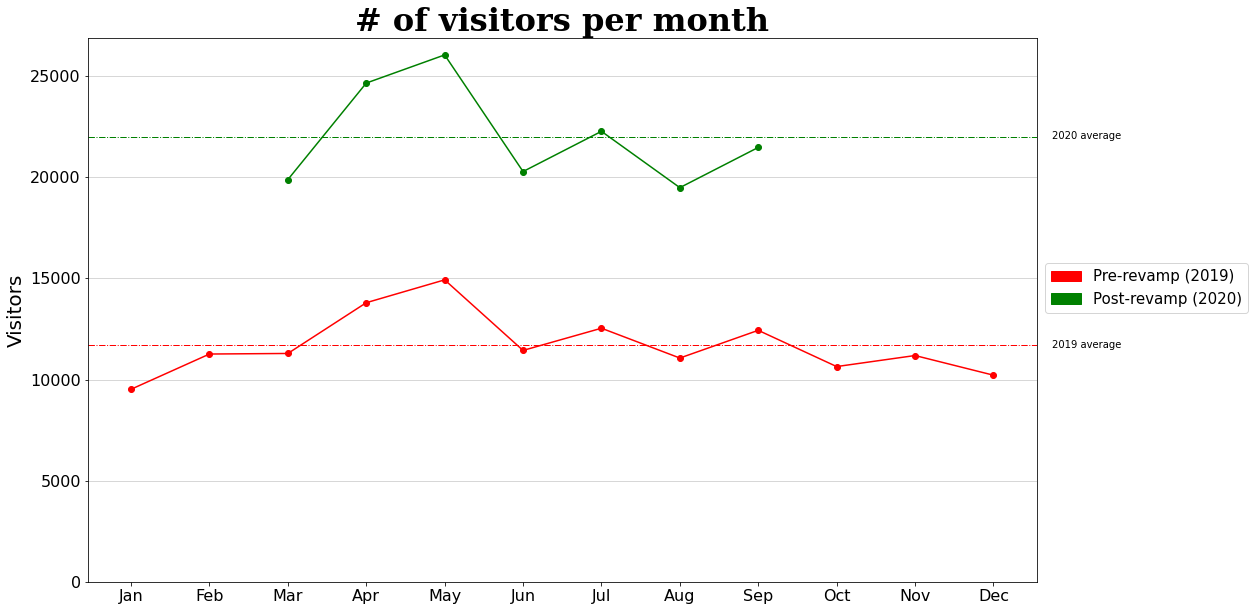

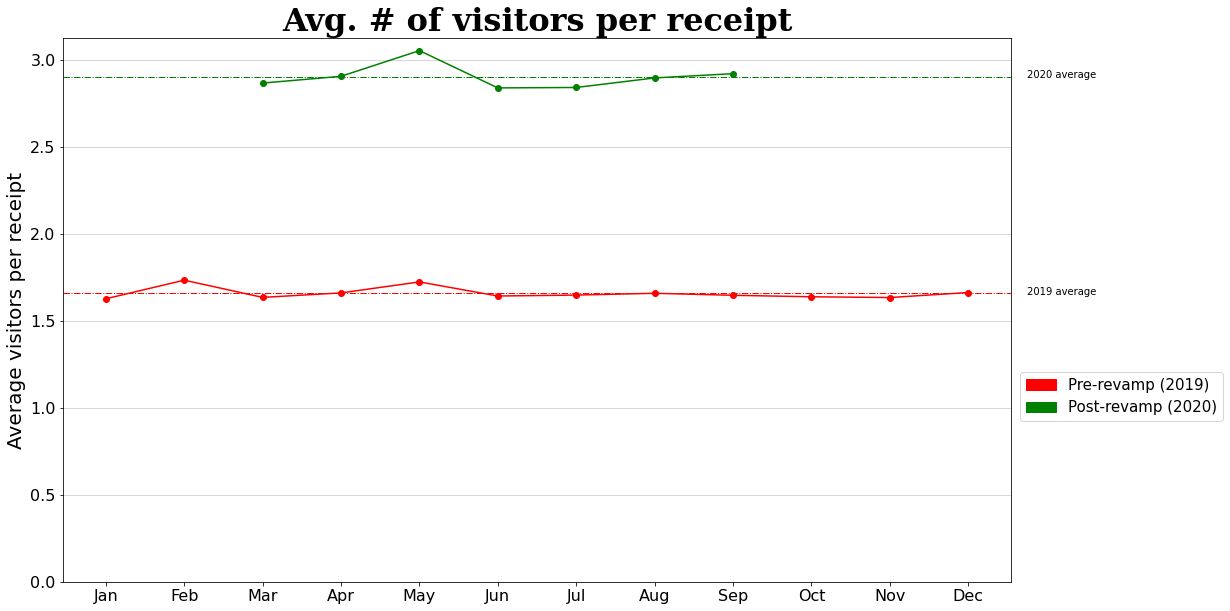

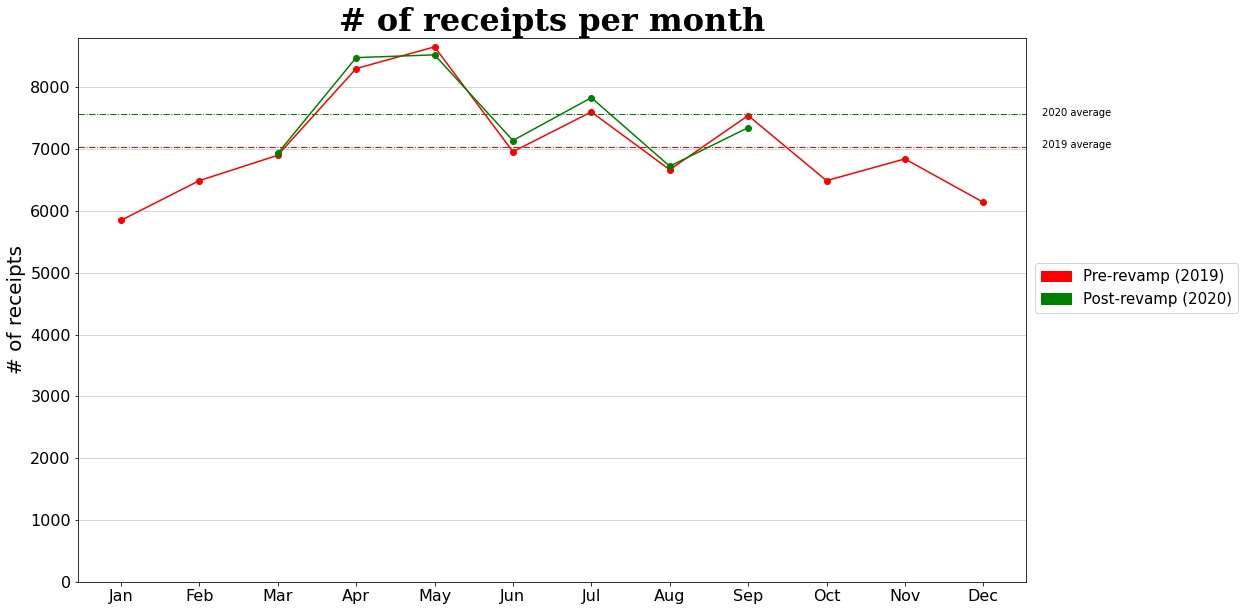

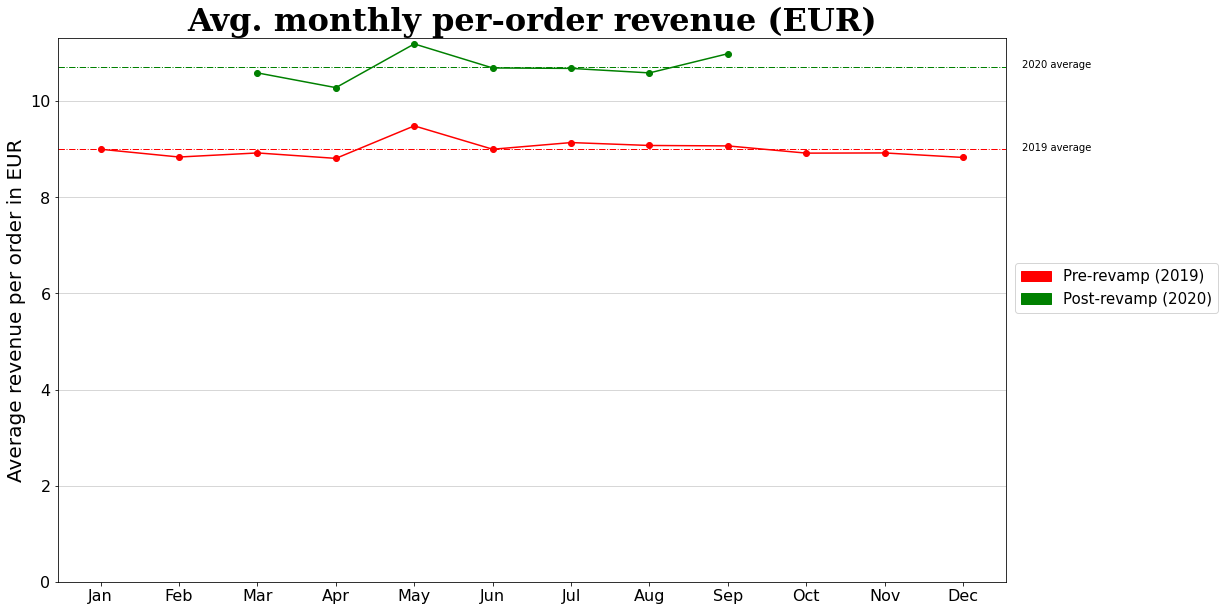

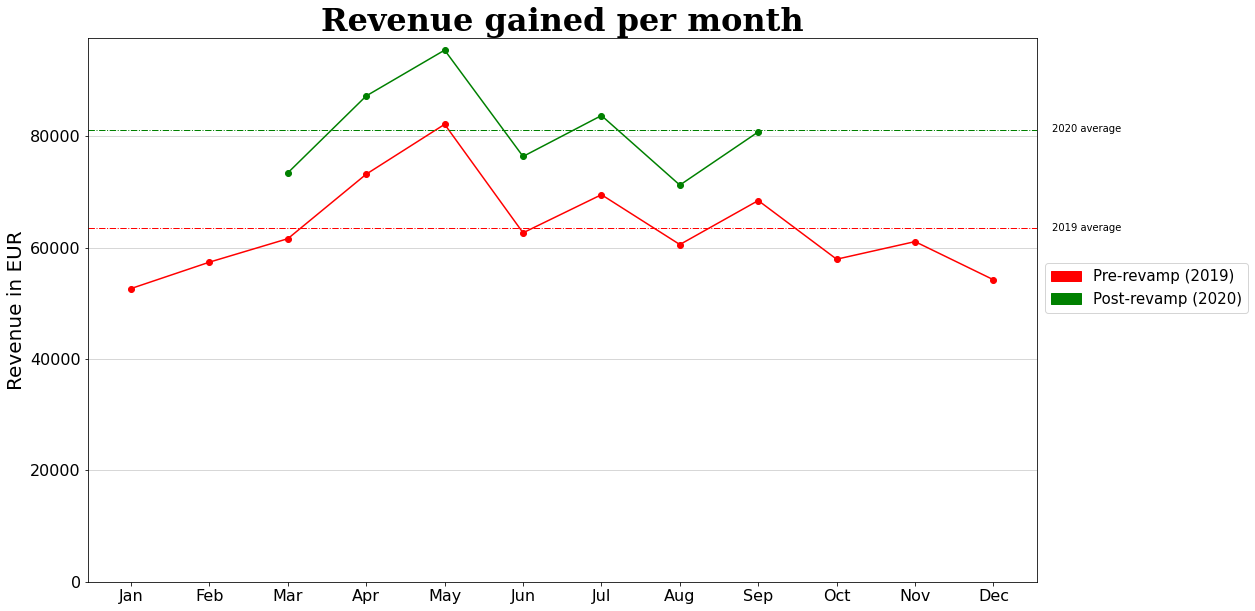

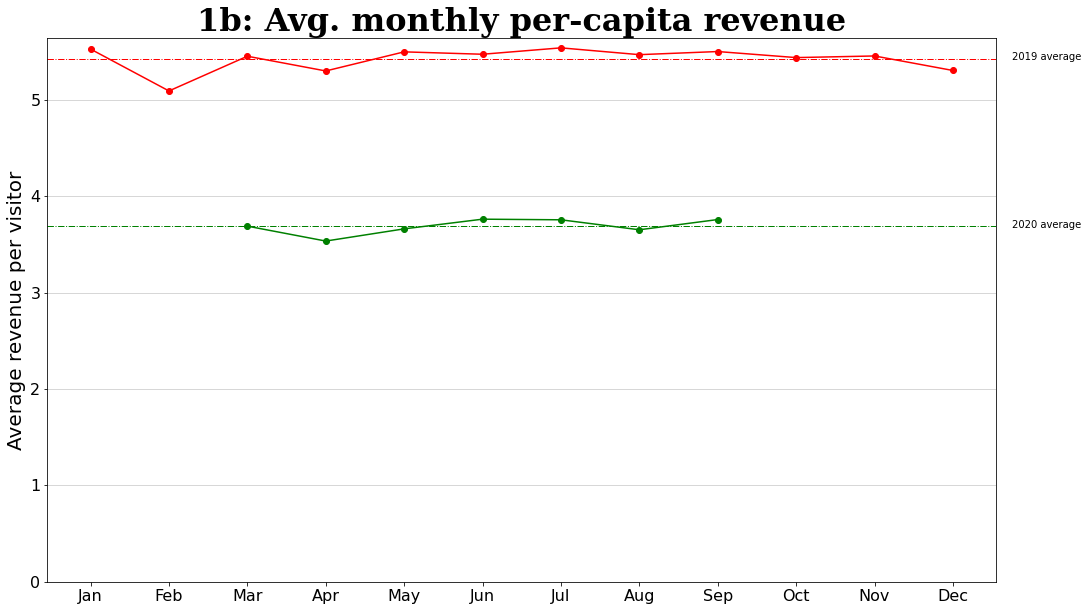

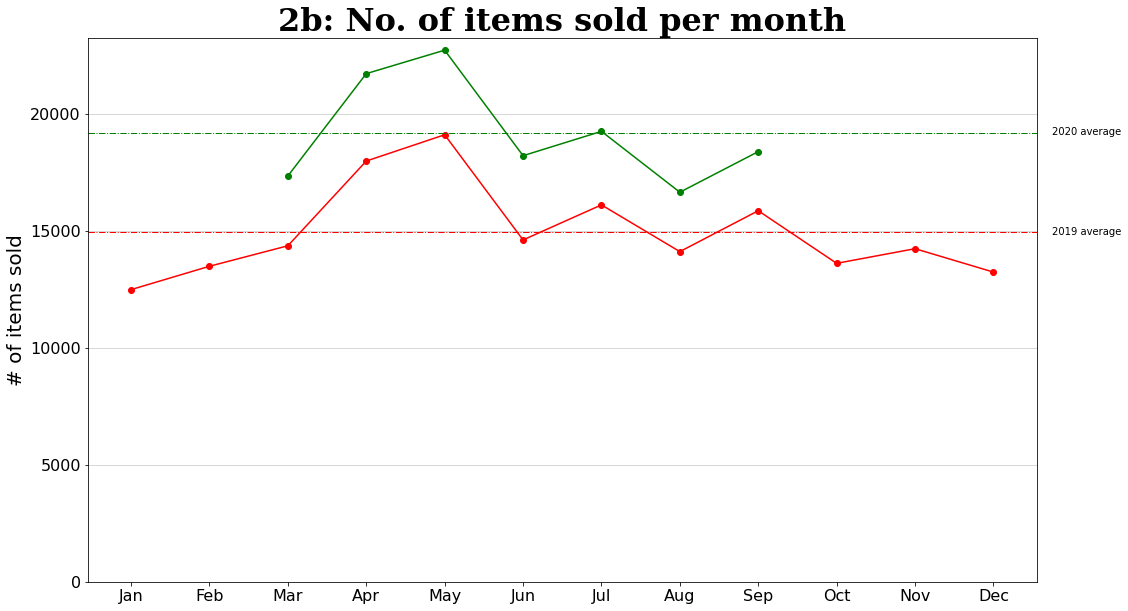

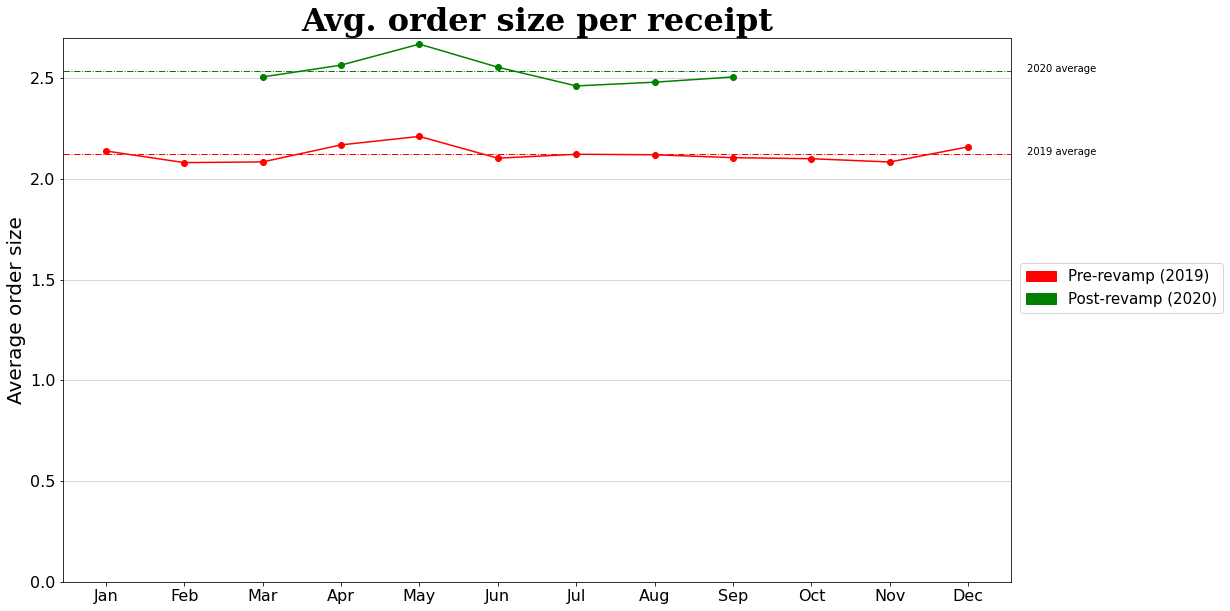

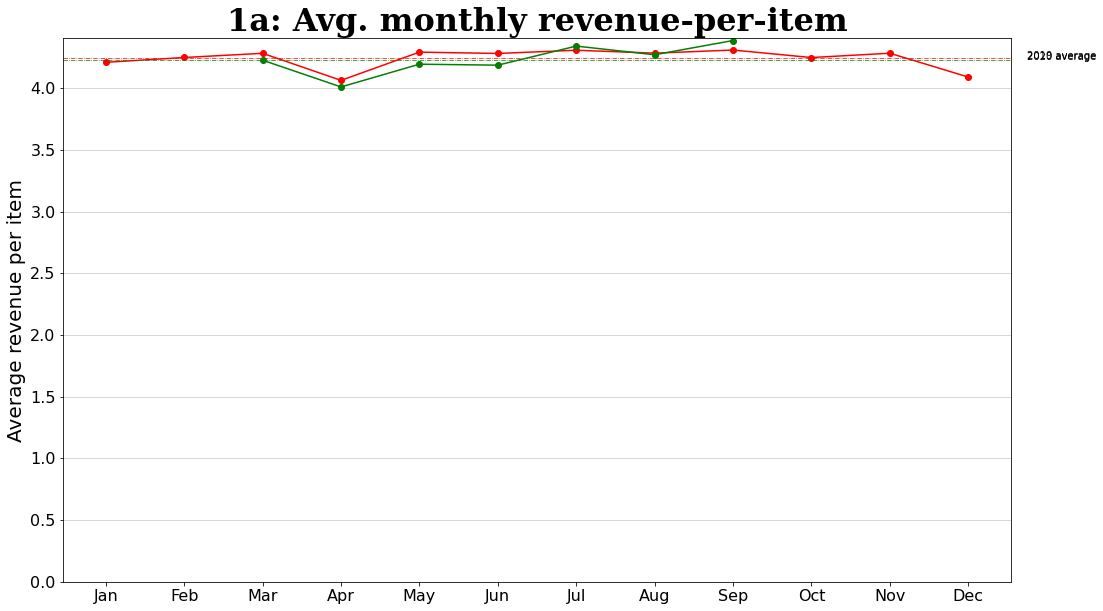

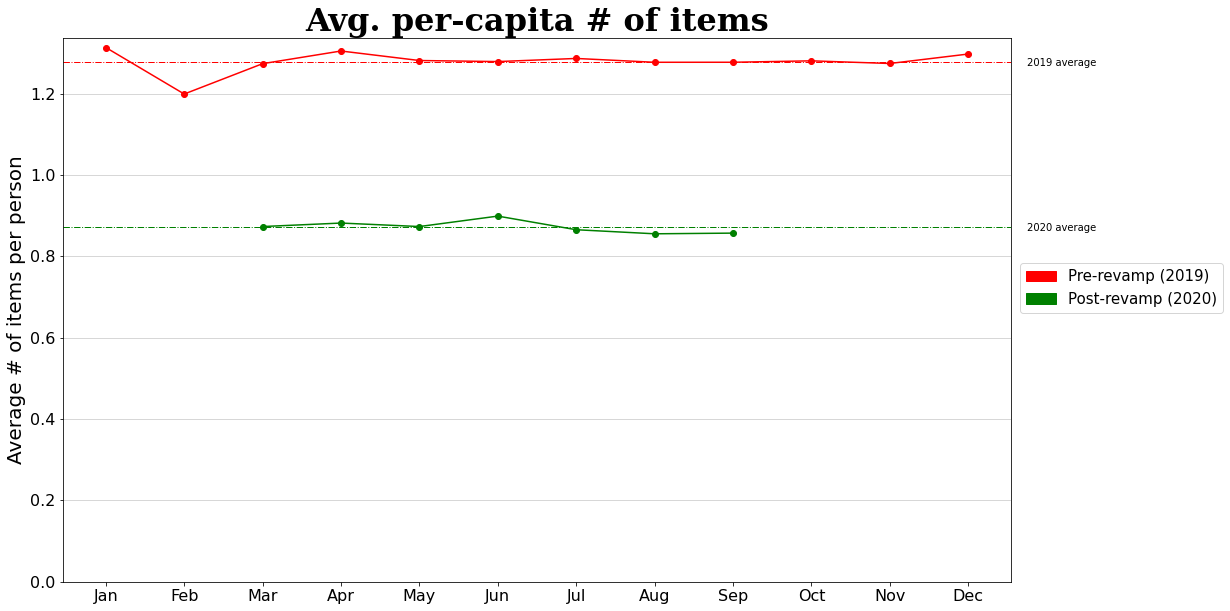

In [7]:
# no. of visitors per month
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.visitors, '-ro')
plt.axhline(y = np.mean(mo_2019.visitors), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.visitors) - 125, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.visitors, '-go')
plt.axhline(y = np.mean(mo_2020.visitors), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.visitors) - 125, s = '2020 average')
plt.ylabel('Visitors', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = '# of visitors per month', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show() 

# Avg. no. of visitors per receipt
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_size, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_size), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_size) - 0.01, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_size, '-go')
plt.axhline(y = np.mean(mo_2020.avg_size), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_size) - 0.01, s = '2020 average')
plt.ylabel('Average visitors per receipt', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = 'Avg. # of visitors per receipt', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.4), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show()

# no. of receipts per month
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.receipts, '-ro')
plt.axhline(y = np.mean(mo_2019.receipts), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.receipts) - 25, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.receipts, '-go')
plt.axhline(y = np.mean(mo_2020.receipts), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.receipts) - 25, s = '2020 average')
plt.ylabel('# of receipts', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = '# of receipts per month', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show() 

# Avg. monthly per-order revenue
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_check, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_check), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_check) - 0.025, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_check, '-go')
plt.axhline(y = np.mean(mo_2020.avg_check), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_check) - 0.025, s = '2020 average')
plt.ylabel('Average revenue per order in EUR', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = 'Avg. monthly per-order revenue (EUR)', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show()

# Revenue gained per month
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.revenue, '-ro')
plt.axhline(y = np.mean(mo_2019.revenue), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.revenue) - 500, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.revenue, '-go')
plt.axhline(y = np.mean(mo_2020.revenue), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.revenue) - 500, s = '2020 average')
plt.ylabel('Revenue in EUR', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = 'Revenue gained per month', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show() 

# Average revenue per visitor
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_per_cap, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_per_cap), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_per_cap) - 0.0125, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_per_cap, '-go')
plt.axhline(y = np.mean(mo_2020.avg_per_cap), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_per_cap) - 0.0125, s = '2020 average')
plt.ylabel('Average revenue per visitor', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = '1b: Avg. monthly per-capita revenue', fontdict = title_font)
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show()

# No. of items sold per month
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019['items'], '-ro')
plt.axhline(y = np.mean(mo_2019['items']), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019['items']) - 100, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020['items'], '-go')
plt.axhline(y = np.mean(mo_2020['items']), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020['items']) - 100, s = '2020 average')
plt.ylabel('# of items sold', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = '2b: No. of items sold per month', fontdict = title_font)
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show() 

# Avg. order size per receipt
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_order, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_order), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_order) - 0.005, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_order, '-go')
plt.axhline(y = np.mean(mo_2020.avg_order), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_order) - 0.005, s = '2020 average')
plt.ylabel('Average order size', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = 'Avg. order size per receipt', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show()

# Avg. monthly revenue-per-item
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_per_item, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_per_item), linewidth = 0.7, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_per_item) - 0.0025, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_per_item, '-go')
plt.axhline(y = np.mean(mo_2020.avg_per_item), linewidth = 0.7, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_per_item) - 0.0025, s = '2020 average')
plt.ylabel('Average revenue per item', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = '1a: Avg. monthly revenue-per-item', fontdict = title_font)
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show() 

# Avg. per-capita no. of items
plt.figure(figsize = (17, 10))
plt.plot(mo_2019.m_nm, mo_2019.avg_percap_ite, '-ro')
plt.axhline(y = np.mean(mo_2019.avg_percap_ite), linewidth = 1, color = 'r', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2019.avg_percap_ite) - 0.01, s = '2019 average')
plt.plot(mo_2020.m_nm, mo_2020.avg_percap_ite, '-go')
plt.axhline(y = np.mean(mo_2020.avg_percap_ite), linewidth = 1, color = 'g', linestyle = 'dashdot')
plt.text(x = 11.75, y = np.mean(mo_2020.avg_percap_ite) - 0.01, s = '2020 average')
plt.ylabel('Average # of items per person', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(label = 'Avg. per-capita # of items', fontdict = title_font)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.6), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-', linewidth = 0.5)
plt.ylim(ymin = 0)
plt.show()

# Plotting graphs for daily data and ratios

### Defining label properties

In [8]:
title_font1 = {'family' : 'serif',
              'size' : 25,
              'weight' : 'bold'}

### Plotting functions

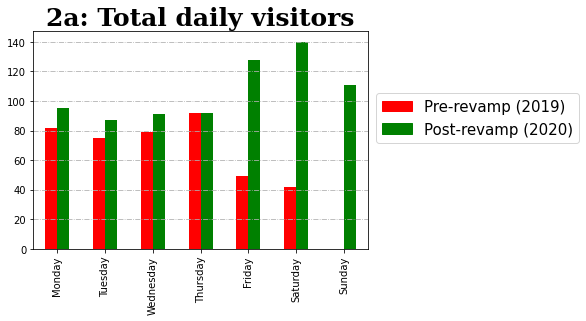

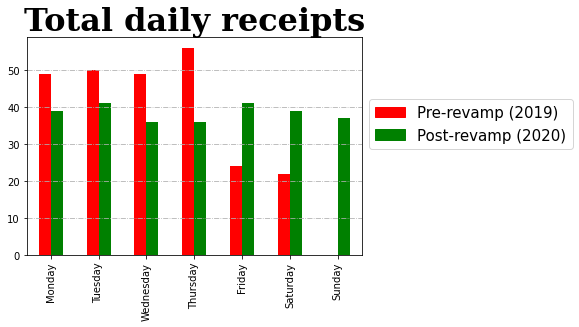

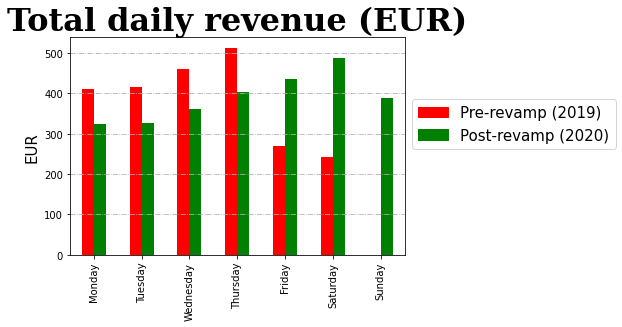

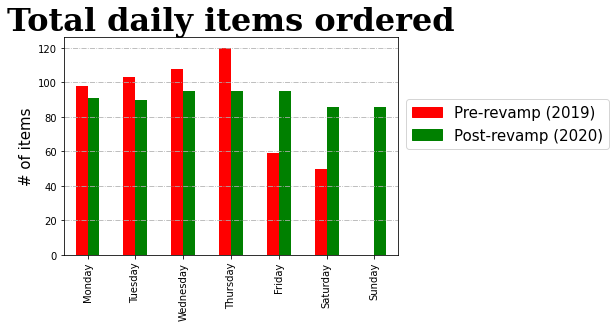

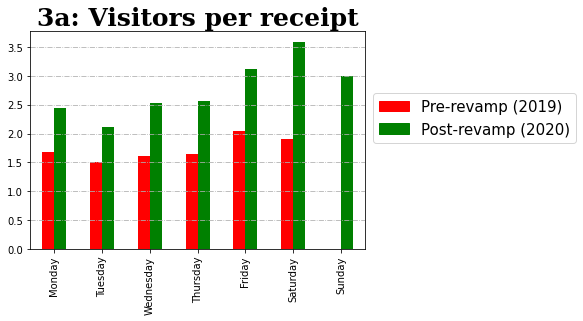

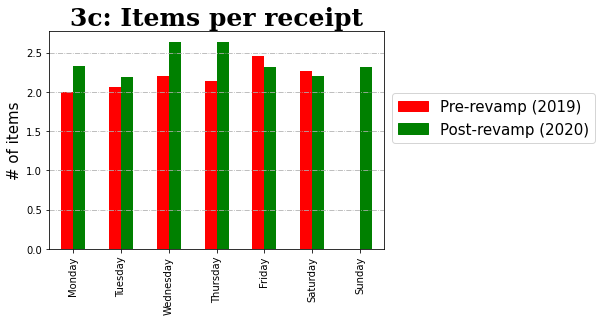

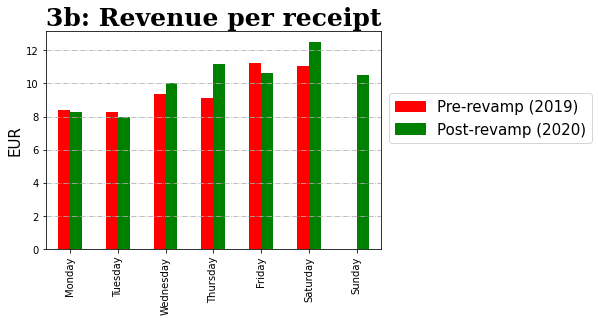

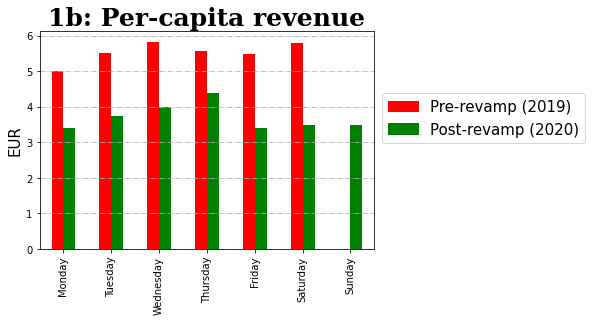

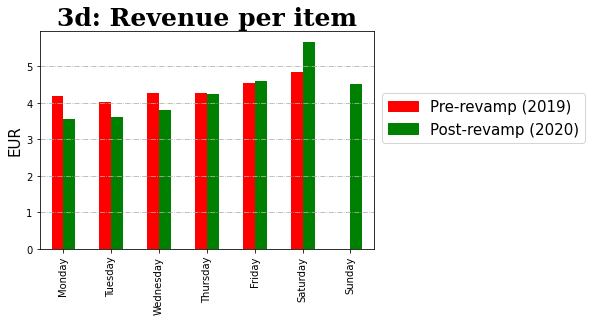

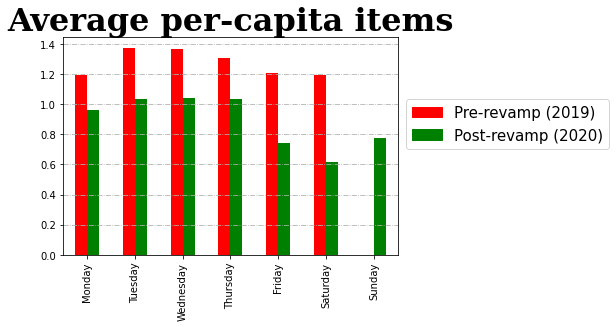

In [9]:
# Total daily visitors
daily.iloc[:, 0:2].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '2a: Total daily visitors', fontdict = title_font1)
plt.xlabel('')
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Total daily receipts
daily.iloc[:, 2:4].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = 'Total daily receipts', fontdict = title_font)
plt.xlabel('')
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Total daily revenue
daily.iloc[:, 4:6].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = 'Total daily revenue (EUR)', fontdict = title_font)
plt.xlabel('')
plt.ylabel('EUR', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Total daily items ordered
daily.iloc[:, 6:8].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = 'Total daily items ordered', fontdict = title_font)
plt.xlabel('')
plt.ylabel('# of items', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Visitors per receipt
daily.iloc[:, 8:10].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '3a: Visitors per receipt', fontdict = title_font1)
plt.xlabel('')
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Items per receipt
daily.iloc[:, 10:12].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '3c: Items per receipt', fontdict = title_font1)
plt.xlabel('')
plt.ylabel('# of items', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Revenue per receipt
daily.iloc[:, 12:14].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '3b: Revenue per receipt', fontdict = title_font1)
plt.xlabel('')
plt.ylabel('EUR', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Per-capita revenue
daily.iloc[:, 14:16].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '1b: Per-capita revenue', fontdict = title_font1)
plt.xlabel('')
plt.ylabel('EUR', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Revenue per item
daily.iloc[:, 16:18].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = '3d: Revenue per item', fontdict = title_font1)
plt.xlabel('')
plt.ylabel('EUR', fontsize = 15)
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')

# Average per-capita items
daily.iloc[:, 18:20].plot(kind = 'bar', color = ['r', 'g'])
plt.title(label = 'Average per-capita items', fontdict = title_font)
plt.xlabel('')
plt.legend(handles = [red, green], bbox_to_anchor=(1.001, 0.75), loc='upper left', prop = {'size' : 15})
plt.grid(b = True, axis = 'y', linestyle = '-.')